# Amittai W

## Computational Comparative Literature

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from pandas import DataFrame
pd.set_option('display.max_rows', 600)
from pathlib import Path  
import glob
from os import path
import numpy.random as random
from IPython.display import display, HTML
import gensim.corpora as corpora
import gensim
from gensim.utils import simple_preprocess

In [2]:
# stop words

class Colors:
  HEADER = '\033[95m'
  OKBLUE = '\033[94m'
  OKCYAN = '\033[96m'
  OKGREEN = '\033[92m'
  WARNING = '\033[93m'
  FAIL = '\033[91m'
  ENDC = '\033[0m'
  BOLD = '\033[1m'
  UNDERLINE = '\033[4m'

def load_stopwords():
  stopwords = []
  with open("../data/metadata/stopwords.txt") as f:
    for line in f:
      # print(line)
      stopwords.append(line.strip()) # .append(line.strip())
  return stopwords

stop_words = load_stopwords()

print(Colors.OKBLUE + "Hello, welcome to my project!" + Colors.ENDC)
print(f"{stop_words = }")

Hello, welcome to my project!
stop_words = ['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'again', 'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'approximately', 'are', 'aren', 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'available', 'away', 'awfully', 'b', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'between', 'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can', 'cannot', "can't", 'cause', 'causes', 'certain', 'cert

In [3]:
# years to focus on
years = [str(yr) for yr in range(2000, 2023)]

# max count per year
max_count = 10

years, max_count

(['2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022'],
 10)

1.

In [4]:
# load $count files for each year.
directory_path = "../data/categorized"

def load_dictionary():
  # all_words = []
  dictionary = set()
  dictionary_file = "../data/metadata/dictionary"
  with open(dictionary_file) as f:
    for line in f:
      dictionary.add(line.strip().lower())
  return dictionary

def load_counts():
  with open("../data/metadata/counts.csv", "r") as counts_file:
    counts = pd.read_csv(counts_file)
  return counts

def load_words():
  """Load data (words) into a list of lists of words."""
  dictionary = load_dictionary()
  stop_words = load_stopwords()
  all_words = []
  for year in years:
    possible_files = [f for f in glob.glob(f"{directory_path}/{year}/*.txt") if path.exists(f)]
    num_files = min(max_count, len(possible_files))
    files = random.choice(possible_files, size=num_files, replace=True)
    words = []
    for file in files:
      with open(file) as f:
        for line in f:
          for word in line.strip().lower().split():
            if word in dictionary and word not in stop_words + ["old", "id"]:
              words.append(word)
    # pd = DataFrame([year, words], columns=["year", "words"])
    all_words.append(words)
  return all_words

all_words = load_words()
def load_words_str():
  """Load data (words) into a list of strings."""
  global all_words
  if "all_words" not in globals():
    all_words = load_words()
  return [" ".join(w) for w in all_words]

def load_data():
  """Load data (words0 into a dataframe)"""
  all_words = load_words_str()
  df = pd.DataFrame(all_words, columns = ["words"])
  df.insert(0, "year", years, allow_duplicates=False)
  return df

raw_data = load_data()
raw_data.head(100)


,year,words
0,2000,project muse art odyssey journal classical ass...
1,2001,department computer science university bachelo...
2,2002,fight climate send wired visit saved visit sav...
3,2003,law chip specialization undermine progress law...
4,2004,complete guide wired visit saved visit saved a...
5,2005,full acquired neurological review augmentative...
6,2006,win fast festival team brand fast distinctive ...
7,2007,lie ai problem technology review lie ai proble...
8,2008,early acid early acid winter young swiss docto...
9,2009,nature green architecture yale environment sch...


In [5]:
# load stopwords
stop_words = load_stopwords()
stop_words

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ah',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apparently',
 'approximately',
 'are',
 'aren',
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'begin',
 'beginning',
 'beginnings',
 'begins',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'biol',
 'both',
 'brief',
 'briefly',
 'but',
 'by',
 'c',
 'ca',
 'came',
 'can',
 'ca

In [6]:
# initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(input='content', stop_words=load_stopwords(), strip_accents="ascii")
tfidf_vector = tfidf_vectorizer.fit_transform(raw_data["words"])


tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=[str(year) for year in years], columns=tfidf_vectorizer.get_feature_names_out())
# data.append(tfidf_df)
data = tfidf_df
data.loc["document"] = data.sum(axis=0)

/root/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['didn', 'doesn', 'don', 'hasn', 'haven', 'isn', 'keep', 'keeps', 'll', 'shouldn', 'sure', 've'] not in stop_words.
  warnings.warn(


In [7]:
# Re-organize so words are in rows rather than columns
cleaned_data = data.sort_index().stack().reset_index()
cleaned_data = cleaned_data.rename(columns={0:'tfidf', 'level_0': 'year','level_1': 'term', 'level_2': 'term'})
# stacked_tfidf_df.sample(n=20)
cleaned_data.sample(n=20)

,year,term,tfidf
287563,2022,equinox,0.004895
80851,2006,doubtless,0.000000
12523,2000,vista,0.000000
134187,2010,heart,0.000000
251033,2019,introspection,0.000000
118728,2009,crude,0.000000
34904,2002,pus,0.000000
303750,document,minor,0.074384
80704,2006,disregard,0.000000
288959,2022,hidebound,0.000000


In [8]:
# top 10 words for all stories
#! MemoryError: Unable to allocate 97.5 GiB for an array with shape (23351, 560214) and data type float64
top_tfidf = cleaned_data.groupby(['year', 'term'])['tfidf'].sum().sort_values(ascending=False).groupby('year')
top_tfidf.head(1000)
# top_tf_

year      term         
document  data             2.001047
          ai               1.284102
          human            1.281930
          people           1.167387
          learning         1.125695
                             ...   
2010      unemployment     0.000000
          unfairly         0.000000
          unfamiliar       0.000000
          unfashionably    0.000000
          unfavorable      0.000000
Name: tfidf, Length: 24000, dtype: float64

In [9]:
# view the top words by year.

for year, data in top_tfidf:
  print(data.head(20))
  print("\n")


year  term     
2000  casino       0.695658
      everett      0.358638
      gambling     0.177779
      gaming       0.168083
      canadian     0.154131
      deposit      0.122789
      ino          0.113715
      bonus        0.094600
      film         0.092840
      protein      0.087474
      cyclops      0.083099
      play         0.080127
      pete         0.077295
      dealer       0.073578
      money        0.070556
      blackjack    0.069978
      comic        0.061231
      big          0.059344
      live         0.058179
      penny        0.056857
Name: tfidf, dtype: float64


year  term       
2001  chromatin      0.433057
      course         0.356474
      phantom        0.343906
      chromosome     0.261758
      nuclear        0.199763
      cell           0.143997
      learning       0.123708
      gene           0.119682
      mode           0.118162
      ray            0.113020
      blended        0.111770
      interphase     0.111770
      reading   

2.

In [10]:
# check for a single word
def check_word(df, word, count):
  """Check the occurrence of a word in a dataframe."""
  return df[df['term'] == word].sort_values("tfidf", ascending=False).head(count)


In [11]:
check_word(cleaned_data, "ethics", 20)

,year,term,tfidf
300509,document,ethics,0.140955
132939,2010,ethics,0.038144
248949,2019,ethics,0.022602
210279,2016,ethics,0.011413
55599,2004,ethics,0.009097
287619,2022,ethics,0.007556
261839,2020,ethics,0.007504
236059,2018,ethics,0.007255
197389,2015,ethics,0.006889
81379,2006,ethics,0.005960


In [12]:
check_word(cleaned_data, "death", 20)

,year,term,tfidf
299355,document,death,0.103871
54445,2004,death,0.021876
170455,2013,death,0.014687
209125,2016,death,0.012475
183345,2014,death,0.009668
41555,2003,death,0.008601
80225,2006,death,0.006515
144675,2011,death,0.004831
106005,2008,death,0.004682
234905,2018,death,0.004406


## Latent Dirichlet Allocation (LDA)

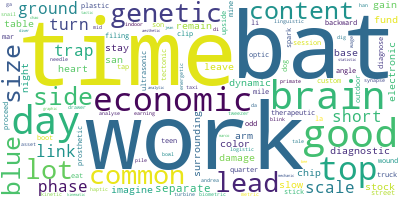

,year,term,tfidf
299330,document,data,2.001047
296764,document,ai,1.284102
301998,document,human,1.281930
304793,document,people,1.167387
303046,document,learning,1.125695
...,...,...,...
301882,document,histopathology,0.001951
304166,document,nonattached,0.001951
304924,document,phosphotungstic,0.001951
307735,document,susanna,0.001951


In [13]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

sorted_words = cleaned_data[cleaned_data["year"] == "document"].sort_values("tfidf", ascending=False)
words = ",".join(sorted_words["term"].values)
# Generate a word cloud
wordcloud.generate(words)
# Visualize the word cloud
display(wordcloud.to_image())
sorted_words

In [14]:
import gensim.corpora as corpora

# ! re-use 'all_words' variable defined earlier.
# all_words = load_words()

id2word = corpora.Dictionary(all_words)

# Term Document Frequency
corpus = [id2word.doc2bow(year_data) for year_data in all_words]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 4), (2, 2), (3, 5), (4, 1), (5, 1), (6, 6), (7, 2), (8, 2), (9, 1), (10, 6), (11, 2), (12, 17), (13, 8), (14, 1), (15, 2), (16, 4), (17, 2), (18, 1), (19, 1), (20, 14), (21, 4), (22, 2), (23, 1), (24, 15), (25, 4), (26, 2), (27, 8), (28, 5), (29, 24)]


In [15]:
from pprint import pprint
# number of topics
print(corpus[:1][0][:30])
num_topics = 10
# Build LDA model
def build_lda():
  """Build LDA model."""
  lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100, chunksize=100, passes=2, workers=8)
  # Print the Keyword in the 10 topics
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]
  return lda_model

[(0, 2), (1, 4), (2, 2), (3, 5), (4, 1), (5, 1), (6, 6), (7, 2), (8, 2), (9, 1), (10, 6), (11, 2), (12, 17), (13, 8), (14, 1), (15, 2), (16, 4), (17, 2), (18, 1), (19, 1), (20, 14), (21, 4), (22, 2), (23, 1), (24, 15), (25, 4), (26, 2), (27, 8), (28, 5), (29, 24)]


In [16]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
LDAvis_data_filepath = f"ldavis_prepared_{str(num_topics)}"
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

rebuild = True  # change this to rebuild the visualization
if rebuild:
    lda_model = build_lda()
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)


# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, f"{LDAvis_data_filepath}.html")
LDAvis_prepared

[(0,
  '0.008*"protein" + 0.005*"cell" + 0.005*"casino" + 0.004*"membrane" + '
  '0.004*"replication" + 0.003*"structure" + 0.003*"human" + 0.003*"clamp" + '
  '0.003*"role" + 0.003*"energy"'),
 (1,
  '0.008*"data" + 0.005*"human" + 0.005*"ai" + 0.004*"people" + 0.004*"author" '
  '+ 0.003*"university" + 0.003*"search" + 0.003*"system" + 0.003*"time" + '
  '0.003*"technology"'),
 (2,
  '0.010*"water" + 0.006*"data" + 0.006*"structure" + 0.005*"protein" + '
  '0.004*"junctional" + 0.004*"pore" + 0.004*"technology" + 0.004*"nature" + '
  '0.004*"human" + 0.003*"membrane"'),
 (3,
  '0.009*"data" + 0.004*"model" + 0.003*"ai" + 0.003*"big" + 0.003*"learning" '
  '+ 0.003*"digital" + 0.003*"work" + 0.003*"search" + 0.003*"time" + '
  '0.003*"people"'),
 (4,
  '0.007*"course" + 0.005*"learning" + 0.005*"chromatin" + 0.004*"data" + '
  '0.004*"cell" + 0.004*"human" + 0.004*"nuclear" + 0.004*"gene" + '
  '0.004*"time" + 0.003*"computer"'),
 (5,
  '0.005*"data" + 0.004*"nature" + 0.004*"rare" + 

/root/anaconda3/envs/ml/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/root/anaconda3/envs/ml/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/root/anaconda3/envs/ml/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/root/anaconda3/envs/ml/lib/python3.10/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbid

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.015440  0.059396       1        1  34.611191
0     -0.081852 -0.037079       2        1  23.332499
8      0.047766 -0.012235       3        1  15.800085
7      0.081328 -0.016001       4        1   6.863500
4     -0.026358  0.007747       5        1   6.145805
5     -0.017588  0.003429       6        1   5.703958
6      0.025417 -0.003172       7        1   3.050319
2     -0.009644 -0.006358       8        1   2.797570
3      0.006984  0.005509       9        1   1.694217
9     -0.010614 -0.001236      10        1   0.000857, topic_info=            Term         Freq        Total Category  logprob  loglift
663         data  1614.000000  1614.000000  Default  30.0000  30.0000
1300       human  1060.000000  1060.000000  Default  29.0000  29.0000
2033     protein   986.000000   986.000000  Default  28.0000  28.0000
364         cell   696.000000   696.000000  Default  27.0000  27.0000
3531    learning   834.000000   834.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1196       group     0.004098   452.038325  Topic10  -6.3315   0.0564
2607      system     0.005030   720.229625  Topic10  -6.1267  -0.2045
1130      future     0.004462   554.336156  Topic10  -6.2465  -0.0626
565      control     0.004540   592.890448  Topic10  -6.2290  -0.1123
2635  technology     0.004114   689.847819  Topic10  -6.3277  -0.3625

[822 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
12206      1  0.056458  abnormal
12206      2  0.056458  abnormal
12206      3  0.621040  abnormal
12206      4  0.112916  abnormal
12206      7  0.056458  abnormal
...      ...       ...       ...
4054       5  0.030176     yeast
4054       6  0.060351     yeast
4054       7  0.015088     yeast
4054       8  0.015088     yeast
4055       5  0.435230       zen

[3329 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 9, 8, 5, 6, 7, 3, 4, 10])